In [143]:
% pylab inline
import numpy as np
#import numpy
import sklearn
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from sklearn import ensemble

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [144]:
#lightc1 = np.load('KeplerSampleWErr_GoodErr_RM.npy')
#lightc2 = np.load('KeplerSampleWErrSparse_RM.npy')

lightc1 = np.load('KeplerSampleWErr.npy')
lightc2 = np.load('KeplerSampleWErrSparse.npy')

In [145]:
print shape(lightc1)
print shape(lightc2)

(2500, 3, 100)
(2500, 3, 50)


In [146]:
X = lightc1[:,1,:]
print shape(X)

(2500, 100)


(array([  2.00000000e+00,   1.20000000e+01,   2.46000000e+03,
          1.40000000e+01,   1.00000000e+00,   4.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([ 0.90457952,  0.93943046,  0.97428141,  1.00913235,  1.04398329,
         1.07883424,  1.11368518,  1.14853612,  1.18338706,  1.21823801,
         1.25308895]),
 <a list of 10 Patch objects>)

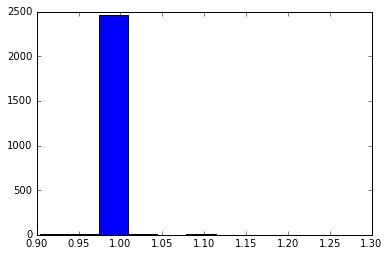

In [147]:
plt.hist(X[:,0][X[:,0] > 0.9],bins=10)

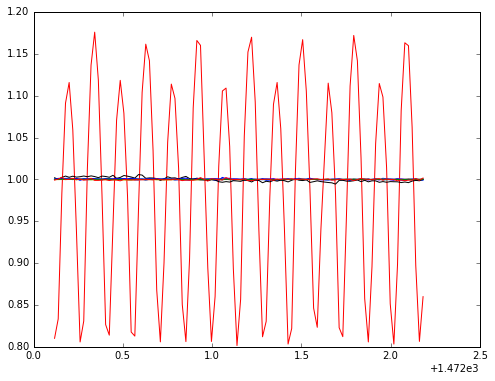

In [212]:
#plt.plot(lightc1[0][0][:],lightc1[0][1][:])
#plt.plot(lightc2[0][0][:],lightc2[0][1][:])
for i in arange(10,20): plt.plot(lightc1[i,0,:],X[i,:])
#plt.plot(lightc1[0][0][:],X[0,:])

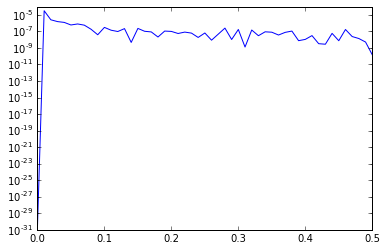

In [174]:
f, Pxx_den = signal.periodogram(X[33,:])
plt.semilogy(f, Pxx_den)

I will get periodograms for all lcvs and use the individual components of the resulting power spectrum as the features. This is of course better than just using the fluxes, since there can be phase differences, etc.

In [158]:
periodograms1 = []
from scipy import signal
for i in arange(2500): 
    f, Pxx_den = signal.periodogram(X[i,:])
    periodograms1.append(Pxx_den)
    
periodograms1 = np.array(periodograms1)

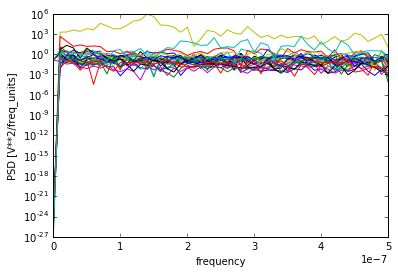

In [159]:
periodograms1[np.where(periodograms1 <= 0.0)] = median(periodograms1)
for i in arange(25): plt.semilogy(f, periodograms1[i])
plt.xlabel('frequency')
plt.ylabel('PSD [V**2/freq_units]')

In [98]:
periodograms = log10(periodograms1)
obj_ids = numpy.arange(len(periodograms))
print obj_ids

[   0    1    2 ..., 2497 2498 2499]


[-7.88478232 -6.80484933 -7.24545646 ..., -6.22286342 -7.54091344
 -7.54108759]
[-6.60918635 -6.80020474 -6.58522787 ..., -7.19897553 -8.24649369
 -8.2184766 ]


(array([   0.,    0.,    1.,    9.,   51.,  206.,  583.,  876.,  547.,
         152.,   35.,   19.,   12.,    5.,    1.,    2.,    0.,    1.,    0.]),
 array([-12.        , -11.26315789, -10.52631579,  -9.78947368,
         -9.05263158,  -8.31578947,  -7.57894737,  -6.84210526,
         -6.10526316,  -5.36842105,  -4.63157895,  -3.89473684,
         -3.15789474,  -2.42105263,  -1.68421053,  -0.94736842,
         -0.21052632,   0.52631579,   1.26315789,   2.        ]),
 <a list of 19 Patch objects>)

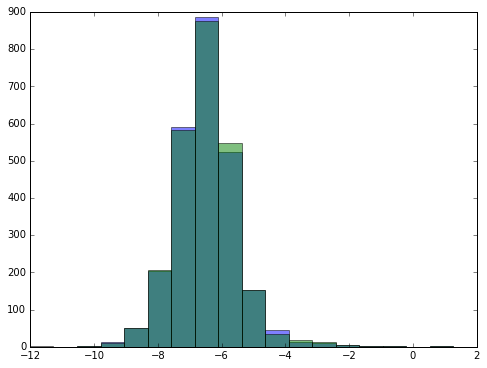

In [128]:
obs_vec = periodograms[:,4]
syn_vec = numpy.random.choice(obs_vec, len(obs_vec))
print obs_vec
print syn_vec
plt.hist(obs_vec,bins=numpy.linspace(-12, 2, 20),alpha=0.5)
plt.hist(syn_vec,bins=numpy.linspace(-12, 2, 20),alpha=0.5)

In [99]:
print periodograms[1]

[-31.01486348  -6.78187662  -7.24746372  -6.94726469  -6.80484933
  -6.57459476  -7.01520496  -7.81811009  -6.44393931  -6.94187483
  -7.85526586  -7.30503582  -7.15173918  -6.82189993  -6.92999445
  -9.35657526  -6.61360305  -8.05700117  -7.88738658  -6.61901004
  -7.10694159  -7.18526427  -6.51503619  -8.38855749  -6.7516257
  -7.38329328  -6.73480871  -6.75180634  -6.38702248  -6.33003172
  -7.04190022  -6.35119979  -6.85039831  -7.05353897  -6.73310862
  -6.26655838  -7.00290948  -6.93026223  -6.69103645  -7.12573749
  -7.19779911  -7.18686572  -8.38623441  -7.94776059  -8.37879292
  -6.90864326  -6.6904558   -6.45396399  -6.51664999  -6.40854219
  -7.67990886]


The features will be the fluxes, so we have 100 features in total. Let's create sythetic data that has the same marginal distributions of the real data. We will use the dense curves. This is all based on Dalya's algorithm. Really cool.

In [129]:
def return_synthetic_data(X):
    """
    The function returns a matrix with the same dimensions as X but with synthetic data
    based on the marginal distributions of its featues
    """
    features = len(X[0])
    X_syn = numpy.zeros(X.shape)

    for i in xrange(features):
        obs_vec = X[:,i]
        syn_vec = numpy.random.choice(obs_vec, len(obs_vec)) # here we chose the synthetic data to match the marginal distribution of the real data
        X_syn[:,i] += syn_vec

    return X_syn

X_syn = return_synthetic_data(periodograms)

In [130]:
print periodograms[:,0]

[-30.41280349 -31.01486348 -30.70505956 ..., -30.70505956 -30.54669707
 -30.54669707]


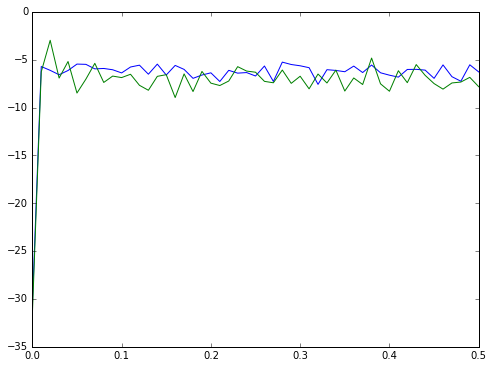

In [131]:
plt.plot(f,periodograms[10])
plt.plot(f,X_syn[10][:])
#plt.ylim(0.995,1.005)

(array([ 2121.,   287.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    92.]),
 array([-32.70505956, -30.11850173, -27.5319439 , -24.94538607,
        -22.35882824, -19.77227041, -17.18571257, -14.59915474,
        -12.01259691,  -9.42603908,  -6.83948125]),
 <a list of 10 Patch objects>)

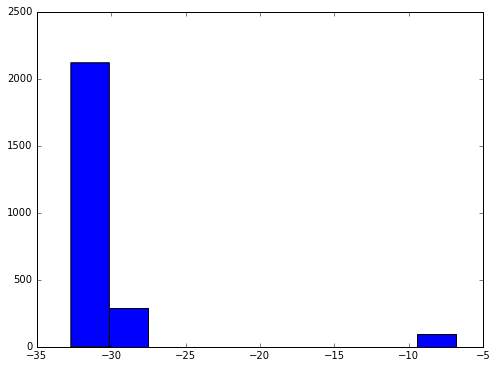

In [132]:
plt.hist(periodograms[:,0])

Now lets plot the marginal distributions of the *'real'* and *'synthetic'* data and make sure that they match for a given feature:

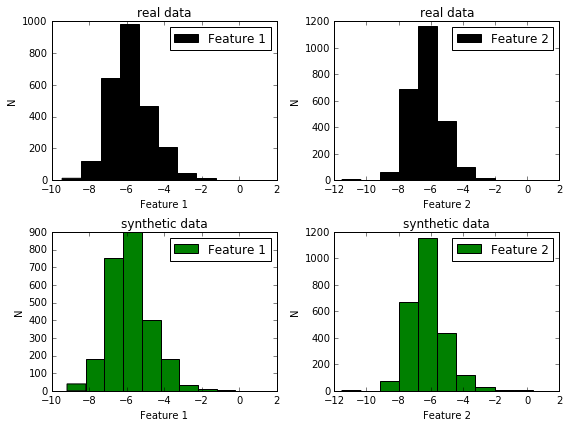

In [133]:
plt.rcParams['figure.figsize'] = 8, 6

plt.subplot(2, 2, 1)
plt.title("real data")
tmp = plt.hist(periodograms[:, 1], bins=10, color="k", label="Feature 1")
plt.legend(loc="best")
plt.xlabel("Feature 1")
plt.ylabel("N")

plt.subplot(2, 2, 2)
plt.title("real data")
tmp = plt.hist(periodograms[:, 2], bins=10, color="k", label="Feature 2")
plt.legend(loc="best")
plt.xlabel("Feature 2")
plt.ylabel("N")

plt.subplot(2, 2, 3)
plt.title("synthetic data")
tmp = plt.hist(X_syn[:, 1], bins=10, color="g", label="Feature 1")
plt.legend(loc="best")
plt.xlabel("Feature 1")
plt.ylabel("N")

plt.subplot(2, 2, 4)
plt.title("synthetic data")
tmp = plt.hist(X_syn[:, 2], bins=10, color="g", label="Feature 2")
plt.legend(loc="best")
plt.xlabel("Feature 2")
plt.ylabel("N")

plt.tight_layout()

In [134]:
def merge_work_and_synthetic_samples(X, X_syn):
    """
    The function merges the data into one sample, giving the label "1" to the real data and label "2" to the synthetic data
    """
    # build the labels vector
    Y = numpy.ones(len(X))
    Y_syn = numpy.ones(len(X_syn)) * 2

    Y_total = numpy.concatenate((Y, Y_syn))
    X_total = numpy.concatenate((X, X_syn))
    return X_total, Y_total

X_total, Y_total = merge_work_and_synthetic_samples(periodograms, X_syn)
# declare an RF
N_TRAIN = 700 # number of trees in the forest
rand_f = sklearn.ensemble.RandomForestClassifier(n_estimators=N_TRAIN)
rand_f.fit(X_total, Y_total)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [135]:
def build_similarity_matrix(rand_f, X):
    """
    The function builds the similarity matrix based on the feature matrix X for the results Y
    based on the random forest we've trained
    the matrix is normalised so that the biggest similarity is 1 and the lowest is 0

    This function counts only leaves in which the object is classified as a "real" object 
    it is also implemented to optimize running time, asumming one has enough running memory
    """
    # apply to get the leaf indices
    apply_mat = rand_f.apply(X)
    # find the predictions of the sample
    is_good_matrix = numpy.zeros(apply_mat.shape)
    for i, est in enumerate(rand_f.estimators_):
        d = est.predict_proba(X)[:, 0] == 1
        is_good_matrix[:, i] = d
    # mark leaves that make the wrong prediction as -1, in order to remove them from the distance measurement
    apply_mat[is_good_matrix == False] = -1 
    # now calculate the similarity matrix
    sim_mat = numpy.sum((apply_mat[:, None] == apply_mat[None, :]) & (apply_mat[:, None] != -1) & (apply_mat[None, :] != -1), axis=2) / numpy.asfarray(numpy.sum([apply_mat != -1], axis=2), dtype='float')
    return sim_mat

sim_mat = build_similarity_matrix(rand_f, periodograms)
dis_mat = 1 - sim_mat

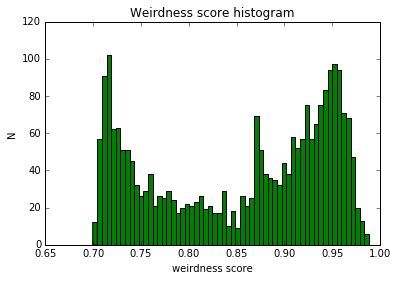

In [136]:
sum_vec = numpy.sum(dis_mat, axis=1)
sum_vec /= float(len(sum_vec))

plt.rcParams['figure.figsize'] = 6, 4
plt.title("Weirdness score histogram")
tmp = plt.hist(sum_vec, bins=60, color="g")
plt.ylabel("N")
plt.xlabel("weirdness score")

In [137]:
print sum_vec

[ 0.71155547  0.82291486  0.75943218 ...,  0.75476247  0.91439045
  0.75617576]


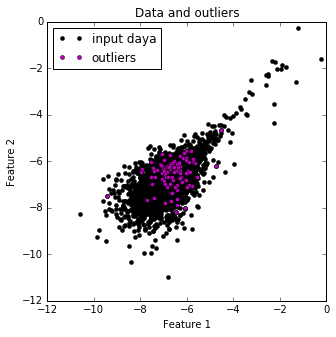

In [138]:
N_outliers = 100
sum_vec_outliers = numpy.sort(sum_vec)[::-1][:N_outliers]
obj_ids_outliers = obj_ids[numpy.argsort(sum_vec)][::-1][:N_outliers]

plt.rcParams['figure.figsize'] = 5, 5
plt.title("Data and outliers")
plt.plot(periodograms[:,10], periodograms[:,11], "ok", label="input daya", markersize=4)
plt.plot(periodograms[obj_ids_outliers, 10], periodograms[obj_ids_outliers, 11], "om", label="outliers", markersize=4)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")	
plt.legend(loc="best")

In [59]:
print shape(X)
print shape(lightc1[obj_ids_outliers,0,:])


(2500, 100)
(1, 100)


In [190]:
N_outliers = 25
sum_vec_outliers = numpy.sort(sum_vec)[::-1][:N_outliers]
obj_ids_outliers = obj_ids[numpy.argsort(sum_vec)][::-1][:N_outliers]

sum_vec_outliers1 = numpy.sort(sum_vec)[:N_outliers]
obj_ids_outliers1 = obj_ids[numpy.argsort(sum_vec)][:N_outliers]

print obj_ids_outliers
print obj_ids_outliers1

#plt.rcParams['figure.figsize'] = 5, 5

#plt.plot(lightc1[obj_ids_outliers,0,:],X[obj_ids_outliers,:])

#plt.title("Data and outliers")
#plt.plot(periodograms[:,2], periodograms[:,3], "ok", label="input daya", markersize=4)
#plt.plot(periodograms[obj_ids_outliers, 2], periodograms[obj_ids_outliers, 3], "om", label="outliers", markersize=4)
#plt.xlabel("Feature 1")
#plt.ylabel("Feature 2")	
#plt.legend(loc="best")

[1150 1190 1552 1623 1017  306 1711  674 1626  403 1231 1324 1723  238 1011
 1199  796  951 1762 1576 1648 1740 2003 2267 2377]
[ 423  576 2240 1997 2143 1934 1162  804  710 2363 1316 1275 1222  853  114
  992 1522 2064 1786 1492 1899 1885 1695 1715  224]


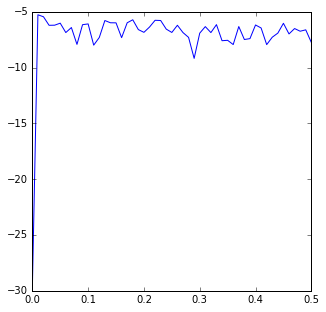

In [142]:
plt.plot(f,periodograms[1190])

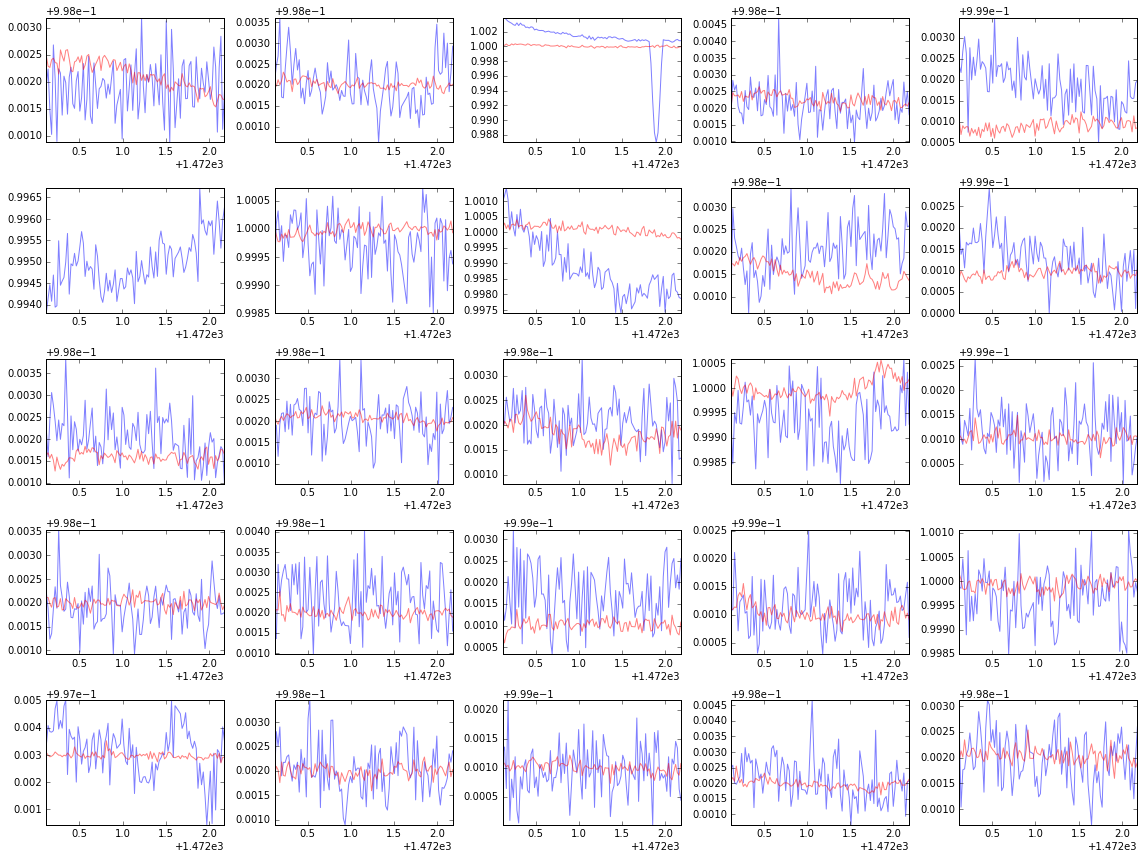

In [215]:
plt.rcParams['figure.figsize'] = 16, 12
for i in arange(25): 
    #print i
    #print obj_ids_outliers[i]
    plt.subplot(5, 5, i+1)
    plt.plot(lightc1[obj_ids_outliers[i],0,:],X[obj_ids_outliers[i],:],color='b',alpha=0.5)
    axis('tight')
    #plt.axis('off')
    plt.plot(lightc1[obj_ids_outliers1[i],0,:],X[obj_ids_outliers1[i],:],color='r',alpha=0.5)
plt.tight_layout()    
plt.savefig('weirdness.png')

#plt.plot(lightc1[1150,0,:],X[1150,:],color='b')
#plt.plot(lightc1[1190,0,:],X[1190,:],color='b')
#plt.plot(lightc1[1552,0,:],X[1552,:],color='b')


#plt.plot(lightc1[423,0,:],X[423,:],color='r')
#plt.plot(lightc1[576,0,:],X[576,:],color='r')
#plt.plot(lightc1[2240,0,:],X[2240,:],color='r')

In [ ]:
plt.rcParams['figure.figsize'] = 8, 6
for i in arange(25): 
    #print i
    #print obj_ids_outliers[i]
    plt.subplot(5, 5, i+1)
    plt.plot(lightc1[obj_ids_outliers[i],0,:],X[obj_ids_outliers[i],:],color='b')
    axis('tight')
    #plt.axis('off')
    #plt.scatter(lightc1[obj_ids_outliers1[i],0,:],X[obj_ids_outliers1[i],:],color='r',alpha=0.5)
plt.tight_layout()    